In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = yf.download(t, start='1995-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1995-01-03,459.109985,743.580017,2068.919922,3065.699951
1995-01-04,460.709991,745.840027,2072.899902,3051.600098
1995-01-05,460.339996,745.659973,2051.459961,3032.300049
1995-01-06,460.679993,749.690002,2058.199951,3065.000000
1995-01-09,460.829987,752.090027,2053.409912,3055.800049


In [5]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2024-06-27,5482.870117,17858.679688,18210.550781,8179.700195
2024-06-28,5460.479980,17732.599609,18235.449219,8164.100098
2024-07-01,5475.089844,17879.300781,18290.660156,8166.799805
2024-07-02,5509.009766,18028.759766,18164.060547,8121.200195
2024-07-03,5537.020020,18188.300781,18374.529297,8171.100098


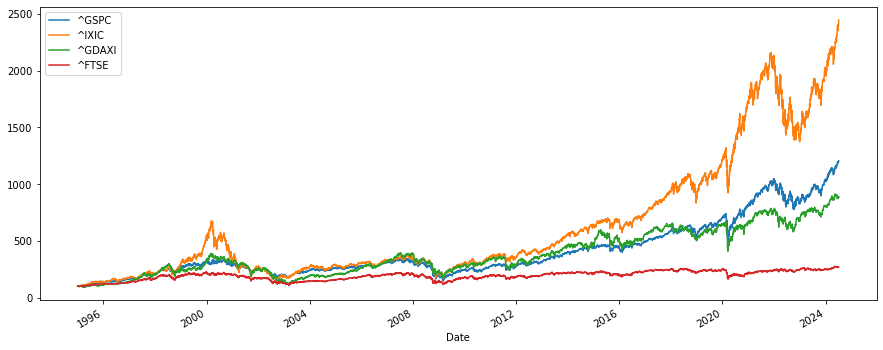

In [6]:
#Normalize to 100 and plot Rate of Return
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));

In [7]:
ind_returns = (ind_data / ind_data.shift(1))-1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2024-06-27,0.000907,0.003006,0.003047,-0.005544
2024-06-28,-0.004084,-0.007060,0.001367,-0.001907
2024-07-01,0.002676,0.008273,0.003028,0.000331
2024-07-02,0.006195,0.008359,-0.006922,-0.005584
2024-07-03,0.005084,0.008849,0.011587,0.006144


In [9]:
annual_ind_returns = ind_returns.mean() * 250
print(annual_ind_returns)

^GSPC     0.101628
^IXIC     0.137159
^GDAXI    0.087972
^FTSE     0.046477
dtype: float64


In [11]:
#positive rate of return is a good sign for investors
# now lets compare differing securities

In [12]:
tickers = ['PG', '^GSPC', '^DJI']

data2 = pd.DataFrame()

for t in tickers:
    data2[t] = yf.download(t, start='2007-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
data2.tail()

,PG,^GSPC,^DJI
Date,,,
2024-06-27,166.619995,5482.870117,39164.058594
2024-06-28,164.919998,5460.479980,39118.859375
2024-07-01,162.720001,5475.089844,39169.519531
2024-07-02,163.899994,5509.009766,39331.851562
2024-07-03,163.830002,5537.020020,39308.000000


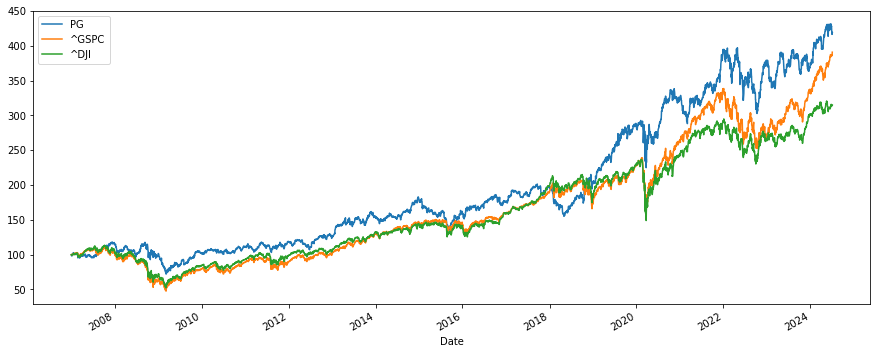

In [15]:
( data2 / data2.iloc[0] * 100).plot(figsize=(15,6));